### Zomato Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import dataset

df = pd.read_csv(r"C:\Users\vivek\Downloads\End-to-End-Zomato-Data-Analysis\Dataset\Zomato_dataset.csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [6]:
# check null values

df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [35]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


**remove '/5' and convert the 'rate' column to float**

In [7]:
df['rate'] = df['rate'].str.replace('/5','').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\vivek\AppData\Local\Temp\ipykernel_2808\1836746405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='listed_in(type)', data=df, palette='Set2')


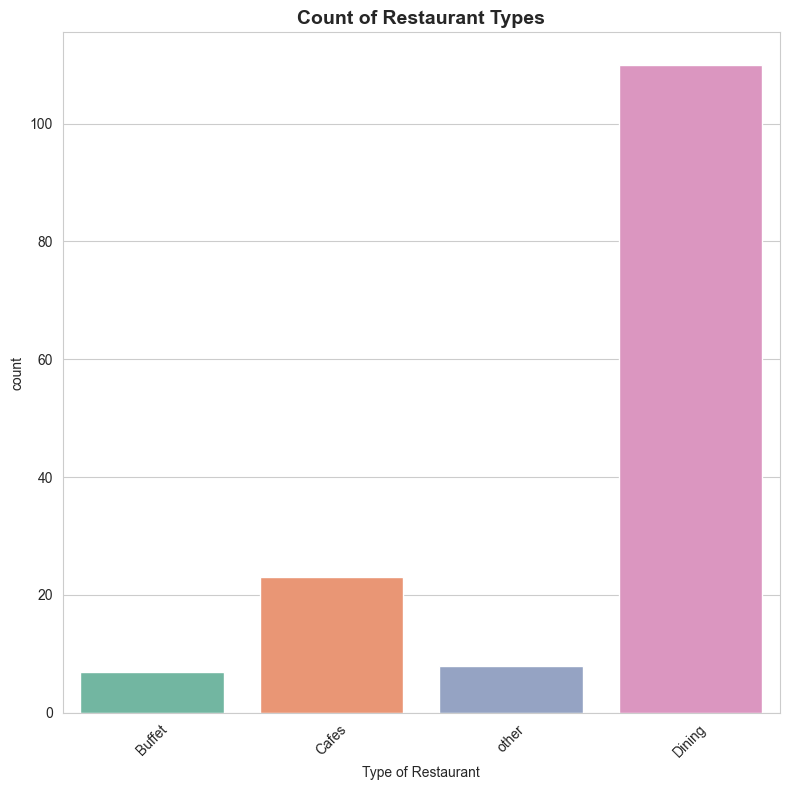

In [10]:
# set a seaborn style
sns.set_style("whitegrid")

# set figure size
plt.figure(figsize=(8, 8))

# create countplot with color palette
sns.countplot(x='listed_in(type)', data=df, palette='Set2')

# add title and labels
plt.title("Count of Restaurant Types", fontsize=14, weight='bold')
plt.xlabel("Type of Restaurant")
plt.xticks(rotation=45)  # Optional: rotate x-labels for readability
plt.tight_layout()
plt.show()


### Dining appears to be most frequent type of resturent

In [34]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9,47,200,Dining


In [12]:
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().reset_index()
votes_by_type = votes_by_type.sort_values(by='votes', ascending=False)
votes_by_type

,listed_in(type),votes
2,Dining,20363
3,other,9367
1,Cafes,6434
0,Buffet,3028


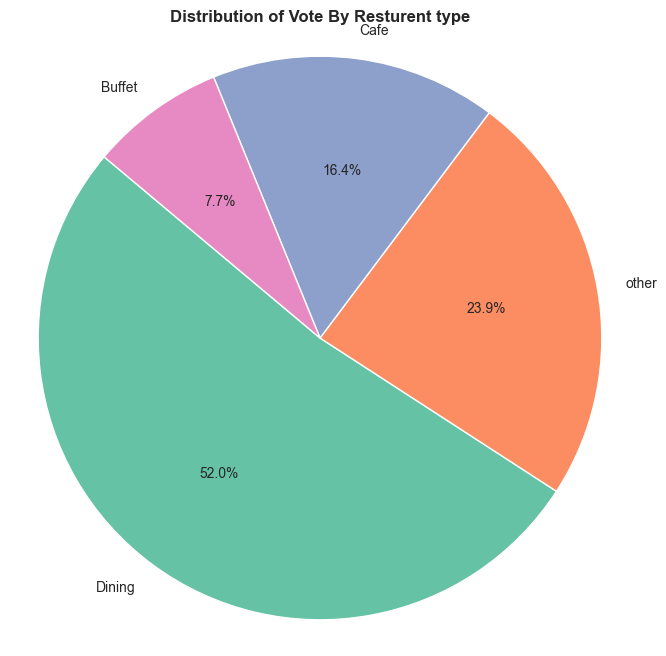

In [13]:
lables = ['Dining', 'other', 'Cafe', 'Buffet']
sizes = [20363,9367,6434,3028]


# pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=lables, autopct='%1.1f%%',startangle=140,colors=sns.color_palette('Set2'))
plt.title('Distribution of Vote By Resturent type', weight='bold')
plt.axis('equal')
plt.show()

### Dining Resturent has Recived maxium votes

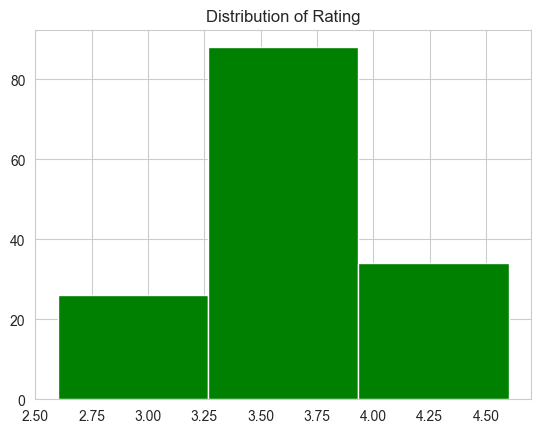

In [14]:
plt.title('Distribution of Rating')
plt.hist(df['rate'],bins=3,color='g')
plt.show()


### Majority resturent recieved from 3.50 to 4

**average order by couples**

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


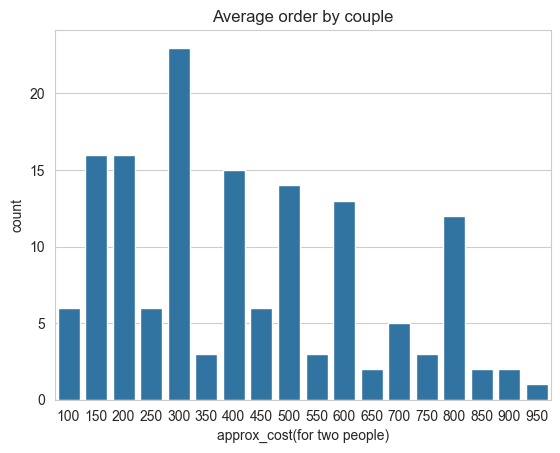

In [16]:
couple_avg_cost = df['approx_cost(for two people)']
sns.countplot(x=couple_avg_cost)
plt.title("Average order by couple")
plt.show()

**which order status have maximum rating**

C:\Users\vivek\AppData\Local\Temp\ipykernel_2808\1430798064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df, palette=["#FF9999", "#66B2FF"])


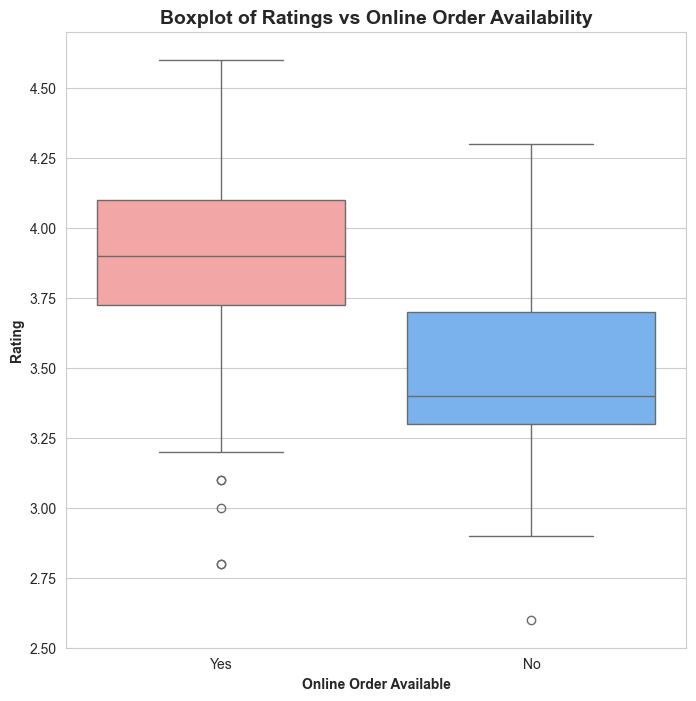

In [28]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='online_order', y='rate', data=df, palette=["#FF9999", "#66B2FF"])
plt.title("Boxplot of Ratings vs Online Order Availability",  weight='bold',fontsize=14)
plt.xlabel("Online Order Available",weight='bold')
plt.ylabel("Rating",weight='bold')
plt.show()


### offline order received lower rating campare to online order

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


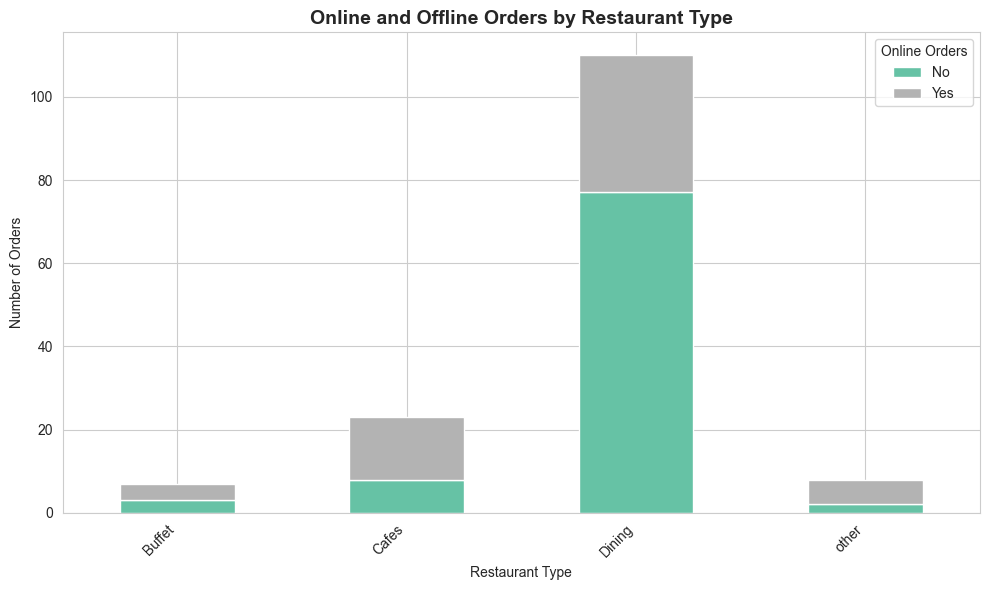

In [33]:
# Count online and offline orders by restaurant type
orders_count = df.groupby(["listed_in(type)", 'online_order']).size().unstack(fill_value=0)

# Plot a stacked bar chart
orders_count.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add plot titles and labels
plt.title("Online and Offline Orders by Restaurant Type", fontsize=14, weight='bold')
plt.xlabel("Restaurant Type")
plt.ylabel("Number of Orders") 
plt.xticks(rotation=45, ha='right')

# Add custom legend
plt.legend(title="Online Orders", labels=['No', 'Yes'])

# Layout adjustment
plt.tight_layout()
plt.show()
